# 1. Loading the Required Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00704.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00562.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00237.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00406.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00448.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Ma

# 2. Data Preprocessing

The code snippet traverses folders containing image files in '.png' format and collects the path and label of these files. It then places this information into a Pandas DataFrame.

In [2]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            if dir_name.split()[-1]!='GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))
                
        
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

# 3. Content of Dataset

In [3]:
data.head() 

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


In [4]:
data.tail()

,path,label
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8999,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


# 4. Converting Data to NumPy Array

In order to use image data in machine learning and deep learning projects, the data must be converted into a numpy array by applying the normalization process.

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(df, target_size=(28, 28)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalization
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)


In [6]:
X, y = load_images(data)

# 5. Splitting Data into Training and Test Sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7200, 28, 28, 3)
X_test shape: (1800, 28, 28, 3)
y_train shape: (7200,)
y_test shape: (1800,)


Visualization

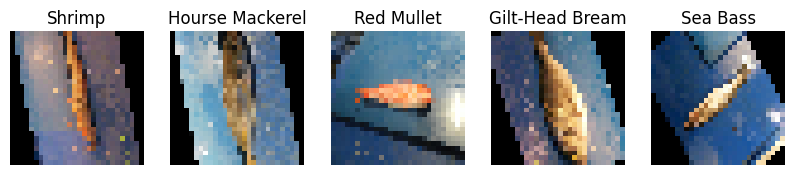

In [9]:
import matplotlib.pyplot as plt

def plot_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{labels[i]}')
        plt.axis('off')
    plt.show()
    
plot_images(X_train, y_train, num_images=5)    

# 6. Apply Flatten Operation

Flattening is the process of converting a multidimensional data structure into a one-dimensional array. This is usually done in deep learning models to prepare the data provided to the input layer.

In [10]:
# X_train array of size (7424, 28, 28, 3)
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 3)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 3)).astype('float32') / 255


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (7200, 2352)
X_test shape: (1800, 2352)


It divides the training data into two sets: train and validation.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
print('y_train shape:', y_train.shape)
print('y_train sample:', y_train[:5])

print('y_val shape:', y_train.shape)
print('y_val sample:', y_val[:5])

print('y_test shape:', y_train.shape)
print('y_test sample:', y_test[:5])

y_train shape: (5760,)
y_train sample: ['Shrimp' 'Trout' 'Red Mullet' 'Gilt-Head Bream' 'Hourse Mackerel']
y_val shape: (5760,)
y_val sample: ['Shrimp' 'Red Mullet' 'Striped Red Mullet' 'Shrimp' 'Striped Red Mullet']
y_test shape: (5760,)
y_test sample: ['Gilt-Head Bream' 'Black Sea Sprat' 'Hourse Mackerel' 'Trout'
 'Red Sea Bream']


In [13]:
unique_y_train = np.unique(y_train)
unique_y_val = np.unique(y_val)
unique_y_test = np.unique(y_test)

print('Unique elements in y_train:', unique_y_train)
print('Number of unique elements in y_train:', len(unique_y_train))

print('Unique elements in y_val:', unique_y_val)
print('Number of unique elements in y_val:', len(unique_y_val))

print('Unique elements in y_test:', unique_y_test)
print('Number of unique elements in y_test:', len(unique_y_test))

Unique elements in y_train: ['Black Sea Sprat' 'Gilt-Head Bream' 'Hourse Mackerel' 'Red Mullet'
 'Red Sea Bream' 'Sea Bass' 'Shrimp' 'Striped Red Mullet' 'Trout']
Number of unique elements in y_train: 9
Unique elements in y_val: ['Black Sea Sprat' 'Gilt-Head Bream' 'Hourse Mackerel' 'Red Mullet'
 'Red Sea Bream' 'Sea Bass' 'Shrimp' 'Striped Red Mullet' 'Trout']
Number of unique elements in y_val: 9
Unique elements in y_test: ['Black Sea Sprat' 'Gilt-Head Bream' 'Hourse Mackerel' 'Red Mullet'
 'Red Sea Bream' 'Sea Bass' 'Shrimp' 'Striped Red Mullet' 'Trout']
Number of unique elements in y_test: 9


# 7. Label Encoding and One Hot Encoding Process

Label encoding is used to convert categorical labels into numerical values. One-hot encoding creates a vector for each label.

In [14]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Label encoding process
label_encoder = LabelEncoder()

# Apply label encoding for y_train, y_val and y_test
y_train_encoded = label_encoder.fit_transform(y_train)  
y_val_encoded = label_encoder.transform(y_val)          
y_test_encoded = label_encoder.transform(y_test)        

# One-hot encoding process
y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_val = tf.keras.utils.to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))
y_test = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Checking new dimensions
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print('y_train sample:', y_train[:5])
print('y_val sample:', y_val[:5])
print('y_test sample:', y_test[:5])

print(type(y_train))
print(type(y_val))
print(type(y_test))


y_train shape: (5760, 9)
y_val shape: (1440, 9)
y_test shape: (1800, 9)
y_train sample: [[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]]
y_val sample: [[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]
y_test sample: [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 8. Creating a Model

In [15]:
model = tf.keras.models.Sequential()

Input layer formation

In [16]:
# Input nesnesi
model.add(tf.keras.layers.Input(shape=(28 * 28 * 3,)))

# Input katmanı
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

Creation of hidden layers. Dropout is a technique used to prevent overfitting.

In [17]:
#Hidden Layer 1
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))

#Hidden Layer 2
model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))

#Hidden Layer 3
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))

In [18]:
# Output layer
model.add(tf.keras.layers.Dense(9, activation='softmax'))

In [19]:
# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 9. Training The Model

To make the training process of the model more efficient, the early stopping technique is used. This technique monitors whether the validation loss of the model is stalling or getting worse during the training period. It helps to prevent over-learning.

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
results = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1730813116.784204     100 service.cc:145] XLA service 0x7f45d400e4a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730813116.784262     100 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


43/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1069 - loss: 2.1943

I0000 00:00:1730813122.772204     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1083 - loss: 2.1933 - val_accuracy: 0.2042 - val_loss: 2.0560
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2166 - loss: 2.0108 - val_accuracy: 0.3049 - val_loss: 1.8127
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2658 - loss: 1.8216 - val_accuracy: 0.3625 - val_loss: 1.6423
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3356 - loss: 1.6742 - val_accuracy: 0.3785 - val_loss: 1.6137
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3856 - loss: 1.5813 - val_accuracy: 0.4347 - val_loss: 1.4239
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4268 - loss: 1.4572 - val_accuracy: 0.4576 - val_loss: 1.3825
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4562 - loss: 1.3756 - val_accuracy: 0.4660 - val_loss: 1.3514
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4737 - loss: 1.3477 - val_accuracy: 0.5104 - val_loss: 1.3062
Ep

# 10. Graphs of the Educational Process

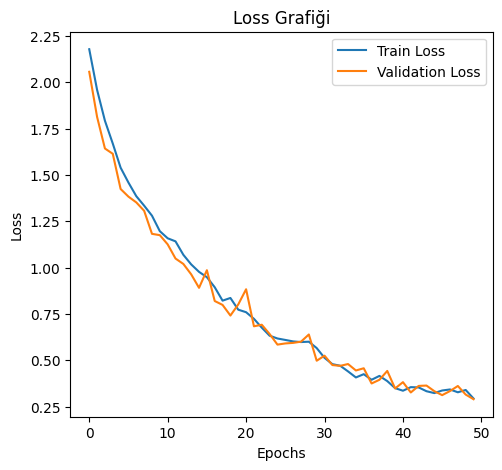

In [21]:
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

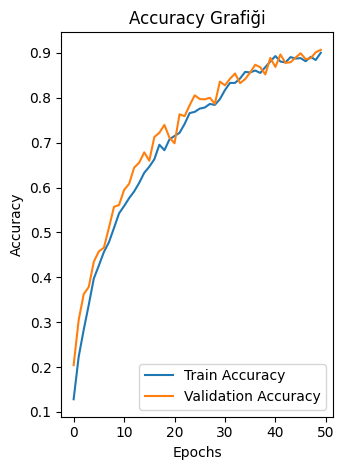

In [22]:
# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 11. Testing Phase

In [23]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [24]:
#Evaluation of the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.2728224992752075
Test Accuracy: 0.9161111116409302


# 12. Classification Report

* Precision: Shows how many of the examples that the model predicted as positive class are actually positive.
* 
Recall: Shows how many of the real positive examples were predicted correctl
* F1-score: It is the harmonic mean of precision and sensitivity.
* Support: It shows the number of real examples in each class.
* Accuracy: It is the ratio of the examples that the model predicted coicted correctly.

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       211
           1       0.90      0.83      0.86       204
           2       0.93      0.95      0.94       195
           3       0.97      0.97      0.97       191
           4       0.90      0.95      0.92       201
           5       0.94      0.87      0.90       179
           6       0.96      0.95      0.96       209
           7       0.89      0.94      0.92       207
           8       0.85      0.81      0.83       203

    accuracy                           0.92      1800
   macro avg       0.92      0.92      0.92      1800
weighted avg       0.92      0.92      0.92      1800



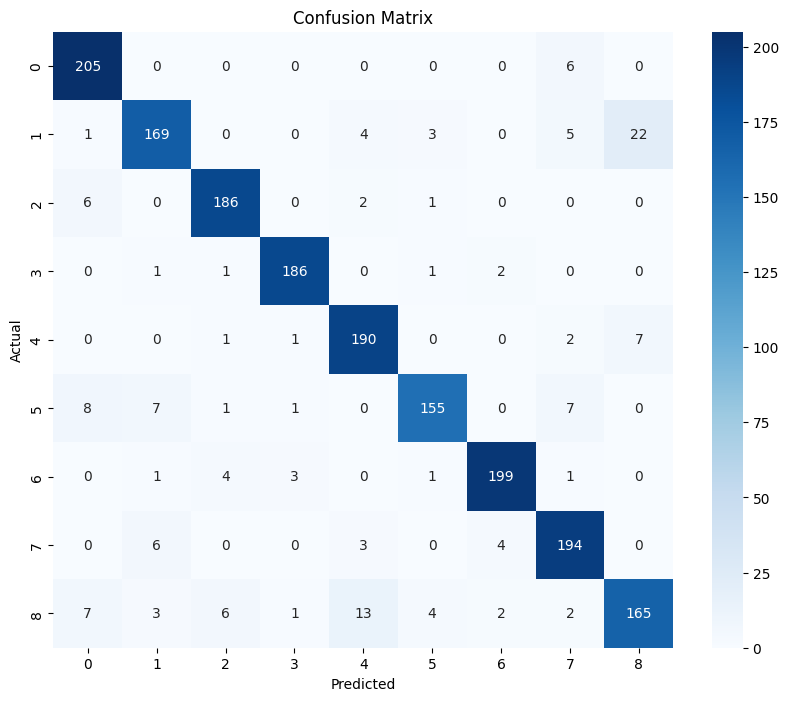

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test to class labels (since one-hot encoding is applied)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()